In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme()

In [17]:
import warnings
warnings.filterwarnings('ignore')

### Movies dataset

In [2]:
# Load datasets
def read_df(path):
    return pd.read_csv(path, sep="\t", compression="gzip", na_values="\\N")

ratings = read_df("title.ratings.tsv.gz")
basics = read_df("title.basics.tsv.gz")
# Only keep movies
df = pd.merge(ratings, basics, on="tconst")
df_movies = df[df['titleType']=='movie']
df_movies.head()

C:\Users\omidk\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
339,tt0000502,4.5,14,movie,Bohemios,Bohemios,0.0,1905.0,NaN,100,NaN
373,tt0000574,6.0,758,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0.0,1906.0,NaN,70,"Action,Adventure,Biography"
382,tt0000591,4.6,17,movie,The Prodigal Son,L'enfant prodigue,0.0,1907.0,NaN,90,Drama
397,tt0000615,4.5,23,movie,Robbery Under Arms,Robbery Under Arms,0.0,1907.0,NaN,NaN,Drama
405,tt0000630,3.8,24,movie,Hamlet,Amleto,0.0,1908.0,NaN,NaN,Drama


In [3]:
print(f"There are %d movies in the dataset." % len(df_movies))

There are 276897 movies in the dataset.


In [5]:
# Separate the genres into categories
dummies = pd.get_dummies(df_movies['genres'])
genres = [c for c in dummies.columns if ',' not in c]
for col in genres:
    df_movies[col] = dummies[[c for c in dummies.columns if col in c]].sum(axis=1)
df_movies.head()

<ipython-input-5-5c7b676a4121>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies[col] = dummies[[c for c in dummies.columns if col in c]].sum(axis=1)


,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
339,tt0000502,4.5,14,movie,Bohemios,Bohemios,0.0,1905.0,NaN,100,...,0,0,0,0,0,0,0,0,0,0
373,tt0000574,6.0,758,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0.0,1906.0,NaN,70,...,0,0,0,0,0,0,0,0,0,0
382,tt0000591,4.6,17,movie,The Prodigal Son,L'enfant prodigue,0.0,1907.0,NaN,90,...,0,0,0,0,0,0,0,0,0,0
397,tt0000615,4.5,23,movie,Robbery Under Arms,Robbery Under Arms,0.0,1907.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
405,tt0000630,3.8,24,movie,Hamlet,Amleto,0.0,1908.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


Here we are interested in the average rating and number of votes of the movies and also their genres and year they came out.

In [6]:
df_movies.describe()

,averageRating,numVotes,isAdult,startYear,endYear,Action,Adult,Adventure,Animation,Biography,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
count,276897.000000,2.768970e+05,276897.000000,276866.000000,0.0,276897.000000,276897.000000,276897.000000,276897.000000,276897.000000,...,276897.000000,276897.000000,276897.000000,276897.000000,276897.000000,276897.000000,276897.000000,276897.000000,276897.000000,276897.000000
mean,6.141886,3.482114e+03,0.016692,1993.324525,NaN,0.103454,0.015757,0.062803,0.017180,0.030412,...,0.037407,0.002362,0.000166,0.111088,0.023702,0.011925,0.000036,0.081890,0.021423,0.018278
std,1.344323,3.373874e+04,0.128115,25.719579,NaN,0.304551,0.124533,0.242609,0.129941,0.171719,...,0.189758,0.048542,0.012888,0.314242,0.152119,0.108549,0.006009,0.274197,0.144790,0.133954
min,1.000000,5.000000e+00,0.000000,1896.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.300000,1.800000e+01,0.000000,1977.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.300000,5.700000e+01,0.000000,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.100000,2.950000e+02,0.000000,2014.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,2.569780e+06,1.000000,2022.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df_movies["logNumVotes"] = np.log(df_movies["numVotes"])

<ipython-input-7-58277f6a2792>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies["logNumVotes"] = np.log(df_movies["numVotes"])


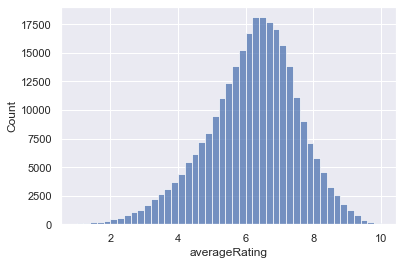

In [8]:
# How are the ratings distributed
sns.histplot(data=df_movies, x="averageRating", binwidth=0.20);

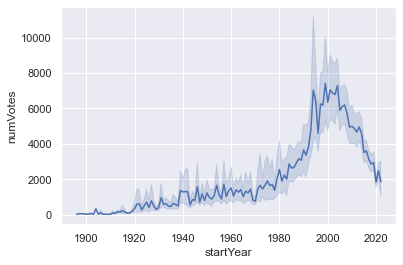

In [9]:
# Do newer movies receive more ratings ? 
sns.lineplot(data=df_movies, x="startYear", y="numVotes");

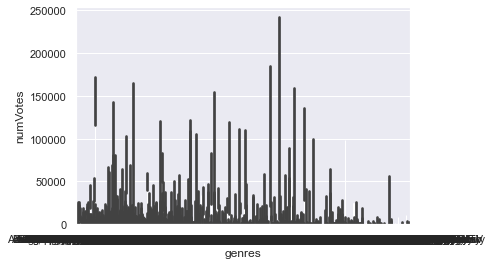

In [10]:
# What genres of movies receive more attention over time ?
# TODO: only keep n most relevant genres
sns.barplot(data=df_movies.explode("genres"), x="genres", y="numVotes");

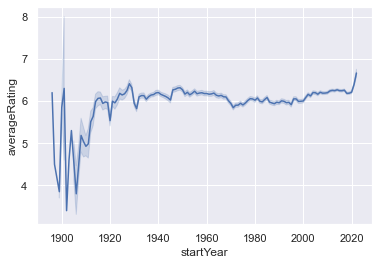

In [11]:
sns.lineplot(data=df_movies, x="startYear", y="averageRating");
# Important question: the increase of the average rating is due to real
# improvement of the movies or are we biased to give a better rating to
# what is more recent 

### Actors dataset

In [12]:
actors = read_df("name.basics.tsv.gz")
actors.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899.0,1987.0,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0072308,tt0053137"
1,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0037382,tt0071877,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934.0,NaN,"actress,soundtrack,music_department","tt0057345,tt0056404,tt0049189,tt0054452"
3,nm0000004,John Belushi,1949.0,1982.0,"actor,soundtrack,writer","tt0080455,tt0078723,tt0072562,tt0077975"
4,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0069467,tt0060827,tt0083922,tt0050986"


Here we are mostly interested in the actors, and eventually directors. The attribute "knownForTitle" will be used to link the actors together.